## Chapter 9 - Miscellaneous Exercises

### TryIt 9.1 - Lag (Non-Ideal) Compensator
Use the following Python and Python Control Systems library to reproduce Figure 9.13.

Figure 9.13 is from Example 9.2 which explains how to design a lag-compensator.

The plant in question is

$$
G_{p} = \frac{K}{(s+1)(s+2)(s+10)}
$$

where $K = 164.6$. The lag-compensator is

$$
G_{c} = \frac{s+0.111}{s+0.01}
$$

Text(0.5, 1.0, 'Uncompensated Vs Lag-Compensated Step Response')

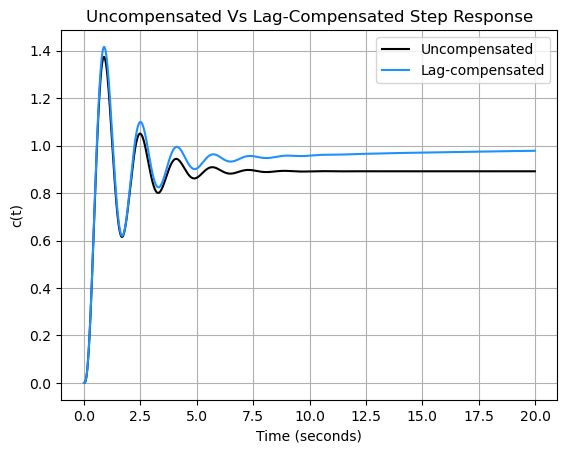

In [5]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# Create transfer function with zeros, poles, and gain
Gu = ct.zpk([],[-1,-2,-10],164.6)   # Create plant transfer function
Gc = ct.zpk([-0.111],[-0.01],1)     # Create lag compensator transfer function
Gce = Gu*Gc                         # Cascade the systems by multiplying

# Place open-loop transfer functions into a negative feedback loop
Tu = ct.feedback(Gu,1)              # Place uncompensated system in a unity feedback loop
Tc = ct.feedback(Gce,1)             # Place compensated system in a unity feedback loop

# Compute step responses for uncompensated and compensated systems
# For time series below, time in plot appears to be 20 sec. Sample time was chosen arbitrarily
t = np.arange(0, 20, 0.010) # Generate 20 second time series with 10ms sample time
Tu_resp = ct.step_response(Tu, t)
Tc_resp = ct.step_response(Tc, t)

# Plot uncompensated vs compensated step responses
y1 = Tu_resp.outputs['y[0]']
y2 = Tc_resp.outputs['y[0]']
plt.plot(t,y1,'k',t,y2,'dodgerblue')
plt.grid(True)
plt.legend(['Uncompensated', 'Lag-compensated'])
plt.ylabel('c(t)')
plt.xlabel('Time (seconds)')
plt.title('Uncompensated Vs Lag-Compensated Step Response')

### Skill-Assessment Exercise 9.1
#### Lag Compensator Design
__PROBLEM:__ A unity feedback system with the forward function

$$
G(s) = \frac{K}{s(s+7)}
$$

is operating with a closed-loop step response that has a 15% overshoot. Do the following:

__a.__ Evaluate the steady-state error for a unit ramp input.

Find $K$ by plotting the root locus and locating where the root locus crosses the 15% overshoot radial line. The gain at this point (given by the `rlocus()` function) is $K$.

However, the radial lines in the root locus plots are given by damping ratio, not % overshoot. So the damping ratio will be found first (Eq 4.39).

$$
\zeta = \frac{-ln(OS/100)}{\sqrt{\pi^{2}+ln^{2}(OS/100)}} = \frac{-ln(15/100)}{\sqrt{\pi^{2}+ln^{2}(15/100)}} = 0.5169
$$

In [6]:
import numpy as np

os = 15 # Percent given as whole number
damp_rat = -np.log(os/100)/np.sqrt(np.pi**2+(np.log(os/100)**2))
print('Damping Ratio = %.4f' % damp_rat) # "damp rat" heh

Damping Ratio = 0.5169


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


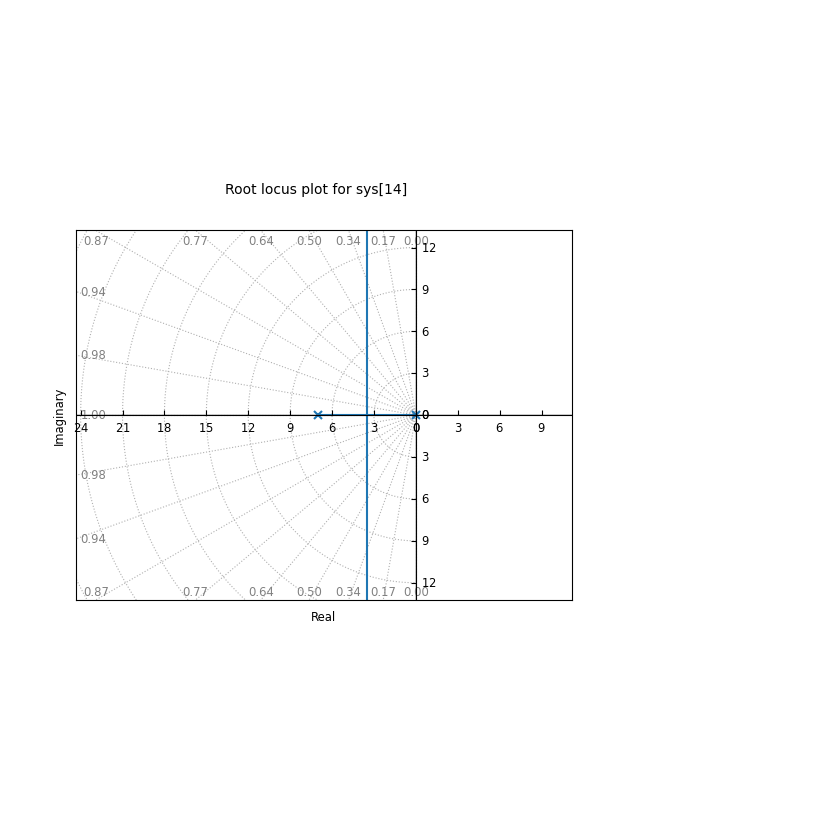

In [7]:
# %matplotlib ipympl # Use this for interacting with the plot, e.g. selecting points
import numpy as np
import control as ct

numg = [1]
deng = np.poly([0,-7])
G = ct.tf(numg, deng)
ct.rlocus(G)

Selecting a point on the root locus with a damping ratio value as close as possible to 0.5169, I selected $s=-3.506+5.805j$ with $K=45.94$.

Using Table 7.2, observe that the system is Type 1, and the steady-state error for a ramp input for this system type is

$$
e(\infty) = \frac{1}{K_{v}}
$$

where 

$$
K_{v} = \lim_{s\to0} sG(s) = \lim_{s\to0}\frac{K}{s+7} = \frac{45.94}{7} = 6.562857
$$

The steady-state error for a ramp input is then

$$
e(\infty) = \frac{1}{K_{v}} = \frac{7}{45.94} = 0.1524
$$

__b.__ Design a lag compensator to improve the steady-state error by a factor of 20.

Even though $e(\infty)$ was previously computed as $0.1524$, the book's answer as $0.1527$ will be used instead.

Followed Example 9.2 closely for this. Admittedly, there are some parts I don't quite understand.

To improve by a factor of 20, divide the error by 20:

$$
e(\infty) = \frac{0.1527}{20} = 0.007635
$$

Find the new compensated $K_{v}$

$$
e(\infty) = \frac{1}{K_{v}} => K_{v} = \frac{1}{e(\infty)} = \frac{20}{0.1527} = 130.975769
$$

The new compensator's zero and pole are equal to the ratio of new compensated $K_{v}$ to the old uncompensated $K_{v}$

$$
\frac{z_{c}}{p_{c}} = \frac{K_{vn}}{K_{vo}} = \frac{130.975767}{6.562857} = 19.95712 \approx 20
$$

Example 9.2 "arbitrarily" sets the compensator pole to $0.01$. My belief is this is done so that the pole is somewhat close to the origin. Regardless, this makes $p_{c} = 0.01$. Then,

$$
z_{c} = 20p_{c} = 20(0.01) = 0.2
$$

Thus, the lag compensator system is

$$
G_{lag}(s) = \frac{s+0.2}{s+0.01}
$$

__c.__ Evaluate the steady-state error for a unit ramp input to your compensated system.

Repeat step __a__ but with the new compensated $G_{c}(s)$. Plot the root locus of the compensated $G_{c}(s)$, find the new gain where the damping ratio line of 0.5169 intersects the new root locus plot, and use this new gain to compute the new steady-state error.

The new compensated $G_{c}(s)$ is

$$
G_{c}(s) = \frac{K(s+0.2)}{s(s+7)(s+0.01)}
$$

Plot the root locus of $G_{c}(s)$.

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


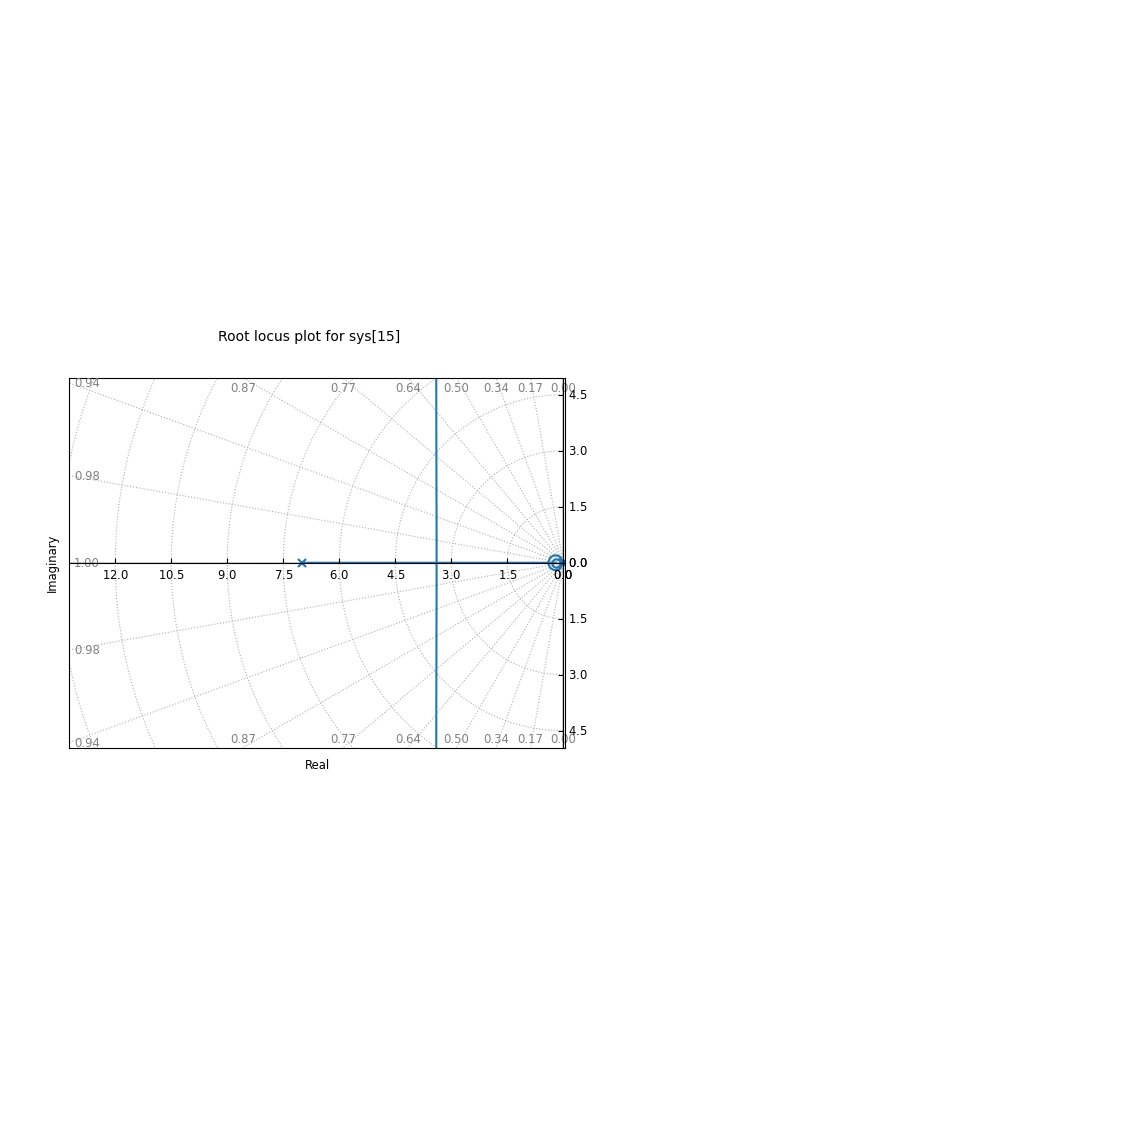

In [8]:
# %matplotlib ipympl # Use this for interacting with the plot, e.g. selecting points
import numpy as np
import control as ct

numg = np.poly([-0.2])
deng = np.poly([0,-7,-0.01])
G = ct.tf(numg, deng)
ct.rlocus(G)

Find the point on the root locus where the damping ratio of 0.5169 crosses. The point I selected was $s=-3.402+5.635j$ with $K = 44.66$.

Find $K_{v}$ which is needed to compute $e(\infty)$:

$$
K_{v} = \lim_{s\to0} sG_{c}(s) = \lim_{s\to0}\frac{K(s+0.2)}{(s+7)(s+0.01)} = \frac{44.66(0.2)}{(7)(0.01)} = 127.6
$$

Now compute $e(\infty)$:

$$
e(\infty) = \frac{1}{K_{v}} = \frac{1}{127.6} = 0.00783
$$

__d.__ Evaluate how much improvement in steady-state error was realized.

Divide the old uncompensated error found in part __a.__ by the new compensated error found in part __c.__

$$
\frac{0.1527}{0.0078} = 19.5769
$$

### Skill-Assessment Exercise 9.2
#### Lead Compensator Design

__PROBLEM:__ A unity feedback system with the forward transfer function

$$
G(s) = \frac{K}{s(s+7)}
$$

is operating with a closed-loop step response that has 15% overshoot. Do the following:

__a.__ Evaluate the settling time.

We have the same $G(s)$ and % overshoot from Skill-Assessment 9.1. The following equation can be used to compute the settle time

$$
T_{s} = \frac{4}{\zeta\omega_{n}}
$$

However, the denominator $\zeta\omega_{n}$ is just the real part of the closed-loop pole. We selected this point in part __a.__ of Skill-Assessment 9.1, which was $s=-3.506+5.805j$. Substitute the absolute value of the real part into the $T_{s}$ equation:

$$
T_{s} = \frac{4}{\zeta\omega_{n}} = \frac{4}{3.506} = 1.141
$$

__b.__ Design a lead compensator to decrease the settling time by three times. Choose the compensator's zero to be at -10.

Compute the new desired settling time, reduced by 3x. Note that the book's answer for part __a__ is being used for the old uncompensated settling time:

$$
\frac{T_{s}}{3} = \frac{1.143}{3} = 0.381
$$

From using $T_{s} = \frac{4}{\zeta\omega_{n}}$ before, it can be seen that since $T_{s}$ has now changed, the real part of the closed-loop pole has also changed. Computing the new real part of the closed-loop pole:

$$
T_{s} = \frac{4}{\zeta\omega_{n}} => \zeta\omega_{n} = \frac{4}{T_{s}} = \frac{4}{0.381} = 10.5
$$

So the real-part of the new closed-loop pole is -10.5.

Next, the imaginary-part of the new closed-loop pole will be found. This can be found using basic trig and geometry.

From trig, the sin of the angle is the imaginary part:

$$
tan(\theta) = \frac{sin(\theta)}{cos(\theta)} => sin(\theta) = cos(\theta)tan(\theta)
$$

$\theta$ can be determined from the damping ratio

$$
\theta = 180^{\circ} - cos^{-1}(\zeta) = 180^{\circ} - cos^{-1}(0.5169) = 180^{\circ} - 58.88^{\circ} = 121.12^{\circ}
$$

Substitute $\theta$ into the equation before it. Remember that $cos(\theta)$ is just the real part already found, so that will be used instead:

$$
sin(\theta) = cos(\theta)tan(\theta) = -10.5tan(121.12^{\circ}) = -17.4
$$

Thus, the new closed-loop pole is $s = -10.5 + j17.4$.

Per the problem's requirements, the zero of the compensator will be at -10.

The sum of the pole and zero angles to the closed-loop pole $s = -10.5 + 17.4$ should be $180^{\circ}$. We have all the poles and zeros, except for the compensator pole, so when we add this sum, it won't be quite $180^{\circ}$. The difference between this sum and $180^{\circ}$ is the angle of the compensator pole.

There are poles at -7 and 0, and the compensator zero at -10. The angle from each of these to $s = -10.5 + 17.4$ will be computed.

The equation for the angle from a real value $p1$ on the real axis to a point in the complex plane $p0$ is

$$
\theta = tan^{-1}(\frac{p0_{im}}{p0_{re}-p1_{re}})
$$

Note that there may be a better, more general way to compute angle. Regardless,


In [9]:
import numpy as np
# TODO: Make more general and clean up
# For example, just add values for poles, zeros, and compensator zero

# Compute angles from poles and zeros on real-axis to closed-loop pole at s = -10.5 + 17.4j
x_p = np.array([7, 0]) - 10.5               # poles minus real part of s
x_z = np.array([10]) - 10.5                 # zeros minus real part of s
y_p = np.full(len(x_p),17.4)                # imaginary part of s
y_z = np.full(len(x_z),17.4) 
theta_p = np.arctan2(y_p,x_p)*(180/np.pi)   # compute pole angles
theta_z = np.arctan2(y_z,x_z)*(180/np.pi)   # compute zero angles
# print(theta_p) # For debugging
# print(theta_z) # For debugging

# Total angular contribution from uncompensated poles and zeros, as well as compensated zero
theta_total = np.sum(theta_z) - np.sum(theta_p) # Total angular contribution is zero angles minus pole angles
print(theta_total)

# Angular contribution from compensator pole
theta_pc = 180 + theta_total
print(theta_pc)

-130.83607403284043
49.16392596715957


Thus, the angle the compensator pole contributes is $49.5^{\circ}$.

See Figure 9.27 for a diagram of how the location of the compensator pole is determined, but it is essentially just geometry, since you now have enough information.

$$
tan(49.2^{\circ}) = \frac{17.4}{p_{c}-10.5} => p_{c} = 25.52
$$

Thus, the system for the lead compensator is

$$
G_{lead}(s) = \frac{s+10}{s+25.52}
$$

which means the transfer function for the overall system is

$$
G_{c}(s) = \frac{K(s+10)}{s(s+25.52)(s+7)}
$$

Determine the gain needed for the new compensated system to maintain 15% overshoot. 

Generate root locus plot, re-select the closed-loop pole of $s=-10+17.4j$ on the root locus (which is still crossing the damping ratio line of 0.5169). The gain at the closed-loop is reported to be 477.2.

Note that the gain K can also be found using the lengths of the vectors from the poles and zeros to the closed-loop pole. See Eq 8.48.



Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


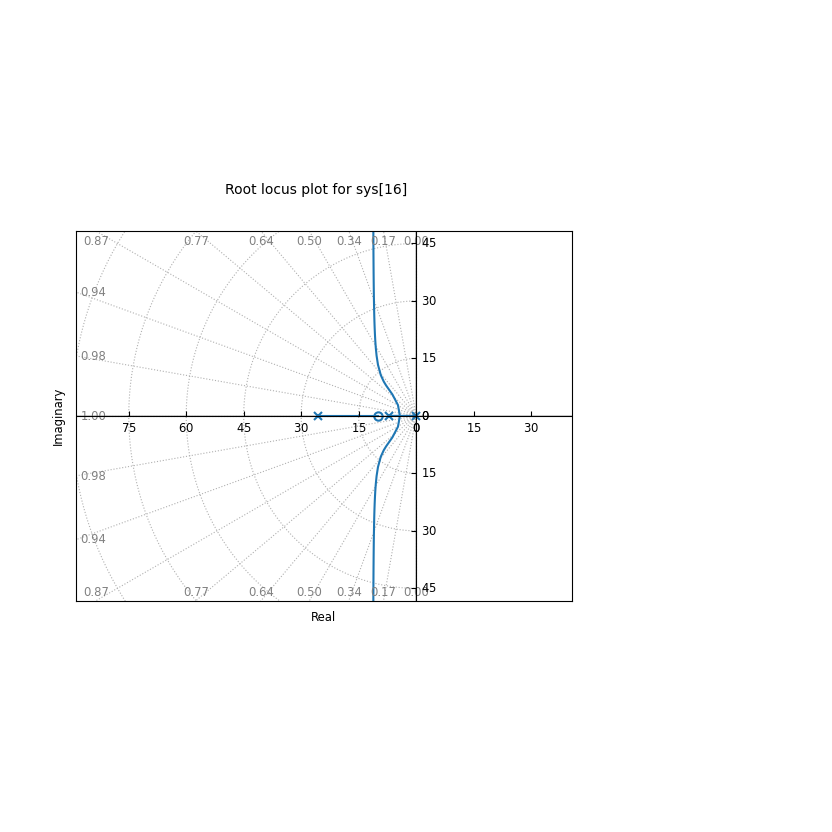

In [10]:
# %matplotlib ipympl # Use this for interacting with the plot, e.g. selecting points
import numpy as np
import control as ct

numg = np.poly([-10])
deng = np.poly([0,-25.52,-7])
G = ct.tf(numg, deng)
ct.rlocus(G)